# CM22010 – Transforms Lab

This lab explores 2D matrix transformations for manipulating and animating shapes.

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [134]:
## Make figures larger
plt.rcParams['figure.figsize'] = [10, 6]

## Try commenting this out if plots look blurry on your screen.
# %config InlineBackend.figure_format = 'retina'

----
## 1. Basic transforms [20 marks]
Implement functions that return 3×3 homogeneous transformation matrices for scaling, translation and rotation.

a) Uniform scaling about the origin [5 marks]

In [135]:
def scaling(scale_factor):
    """Returns a transform matrix for uniform scaling about the origin by 'scale_factor'."""
    
    ## TASK: Replace this code with your own implementation.
    return np.array([
        [scale_factor, 0, 0],
        [0, scale_factor, 0],
        [0, 0, 1]
    ])


## Some test cases to check your implementation.
## Note that the auto-marker will directly check your function, not these test cases.
print("Scaling by 0 should collapse any point to the origin [0, 0, 1].T:")
print(scaling(0) @ np.array([[1, 2, 1]]).T)
print()

print("Scaling [2, 3, 1].T by a factor of 3 should return [6, 9, 1].T:")
print(scaling(3) @ np.array([[2, 3, 1]]).T)
print()

print("Scaling [3, 4, 5].T by a factor of -2 should return [-6, -8, 5].T:")
print(scaling(-2) @ np.array([[3, 4, 5]]).T)

Scaling by 0 should collapse any point to the origin [0, 0, 1].T:
[[0]
 [0]
 [1]]

Scaling [2, 3, 1].T by a factor of 3 should return [6, 9, 1].T:
[[6]
 [9]
 [1]]

Scaling [3, 4, 5].T by a factor of -2 should return [-6, -8, 5].T:
[[-6]
 [-8]
 [ 5]]


----
b) Translation by a vector (x, y) [5 marks]

In [136]:
def translation(point):
    """Returns a transform matrix for translation by 'point[0]' units
    along the x-axis and 'point[1]' units along the y-axis."""

    ## TASK: Replace this code with your own implementation.
    return np.array([
        [1, 0, point[0]],
        [0, 1, point[1]],
        [0, 0, 1]
    ])


## Some test cases to check your implementation.
## Note that the auto-marker will directly check your function, not these test cases.
print("Translating the origin by [1, 2] should return [1, 2, 1].T:")
print(translation([1, 2]) @ np.array([[0, 0, 1]]).T)
print()

print("Translating [3, 4, 1].T by [2, 2] should return [5, 6, 1].T:")
print(translation([2, 2]) @ np.array([[3, 4, 1]]).T)
print()

print("Translating [3, 4, 1].T by [-7, 2] should return [-4, 6, 1].T:")
print(translation([-7, 2]) @ np.array([[3, 4, 1]]).T)

Translating the origin by [1, 2] should return [1, 2, 1].T:
[[1]
 [2]
 [1]]

Translating [3, 4, 1].T by [2, 2] should return [5, 6, 1].T:
[[5]
 [6]
 [1]]

Translating [3, 4, 1].T by [-7, 2] should return [-4, 6, 1].T:
[[-4]
 [ 6]
 [ 1]]


----
c) Rotation (anti-clockwise) [10 marks]

In [137]:
def rotation(angle):
    """Returns a transform matrix for anti-clockwise rotation about the origin by 'angle' degrees."""
    
    ## TASK: Replace this code with your own implementation.
    angle = np.radians(angle)

    return np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle), np.cos(angle), 0],
        [0, 0, 1]
    ])


## Some test cases to check your implementation.
## Note that the auto-marker will directly check your function, not these test cases.
print("Rotating [1, 2, 3].T by 0 zeros should return the same point:")
print(rotation(0) @ np.array([[1, 2, 3]]).T)
print()

print("Rotating [5, 7, 1].T anti-clockwise by 90 degrees should return [-7, 5, 1].T:")
print(rotation(90) @ np.array([[5, 7, 1]]).T)  # 
print()

print("Rotating [2, 0, 1].T clockwise by 45 degrees should return [sqrt(2), -sqrt(2), 1].T:")
print(rotation(-45) @ np.array([[2, 0, 1]]).T)

Rotating [1, 2, 3].T by 0 zeros should return the same point:
[[1.]
 [2.]
 [3.]]

Rotating [5, 7, 1].T anti-clockwise by 90 degrees should return [-7, 5, 1].T:
[[-7.]
 [ 5.]
 [ 1.]]

Rotating [2, 0, 1].T clockwise by 45 degrees should return [sqrt(2), -sqrt(2), 1].T:
[[ 1.41421356]
 [-1.41421356]
 [ 1.        ]]


----
## 2. Compound transforms [20 marks]

a) Combine your scaling, translation and rotation transforms into a single compound transform [10 marks]

Edit the following function to return a 3×3 homogeneous transform matrix that performs anti-clockwise rotation by angle `angle` (in degrees) and uniform scaling by `scale_factor` about the origin, followed by a translation of the origin to the given point `point = [x, y]`, using only your existing `scaling`, `translation` and `rotation` functions.

In [138]:
def rotation_scaling_and_translation(angle, scale_factor, point):
    """Returns a compound transform for rotating by 'angle', scaling by 'scaling_factor',
    and translating by 'point'."""
    
    ## TASK: Replace this code with your own implementation.
    return translation(point) @ rotation(angle) @ scaling(scale_factor)


## Some test cases to check your implementation.
## Note that the auto-marker will directly check your function, not these test cases.
print("Testing scaling only, should return [6, 4, 1].T:")
print(rotation_scaling_and_translation(0, 2, [0, 0]) @ np.array([[3, 2, 1]]).T)
print()

print("Testing rotation only, should return [-5, 4, 1].T:")
print(rotation_scaling_and_translation(90, 1, [0, 0]) @ np.array([[4, 5, 1]]).T)
print()

print("Testing translation only, should return [2, 3, 1].T:")
print(rotation_scaling_and_translation(0, 1, [1, -4]) @ np.array([[1, 7, 1]]).T)
print()

print("Complete test, should return [6, -0.5, 1].T:")
print(rotation_scaling_and_translation(-90, 1.25, [1, 2]) @ np.array([[2, 4, 1]]).T)

Testing scaling only, should return [6, 4, 1].T:
[[6.]
 [4.]
 [1.]]

Testing rotation only, should return [-5, 4, 1].T:
[[-5.]
 [ 4.]
 [ 1.]]

Testing translation only, should return [2, 3, 1].T:
[[2.]
 [3.]
 [1.]]

Complete test, should return [6, -0.5, 1].T:
[[ 6. ]
 [-0.5]
 [ 1. ]]


**Test your compound transformation by visualising it:**

The code in the next cell creates a little animation (click the play button after running the cell).

Read the code and ensure you understand how it works (with reference to your lecture notes).

If your implementation of `rotation_scaling_and_translation` is correct, you will see a blue square of length 3 units rotating about the red point.
Check that your code is general, so that modifying `point` makes the square rotate about the new point, and `scale_factor` affects the size of the blue square accordingly.

In [139]:
## A 2D polygon: a square of 2 by 2 units, in homogeneous coordinates.
## Each column in the matrix defines the coordinates of one corner of the square.
p = np.array([[-1,  1, 1, -1, -1],
              [-1, -1, 1,  1, -1],
              [ 1,  1, 1,  1,  1]])

## The square should eventually rotate about this point.
point = (2, 3)
scale_factor = 1.5

## Prepare a figure for animation.
fig, ax = plt.subplots()
ax.set_xlim((-2, 6))
ax.set_ylim((-2, 6))
ax.set_aspect('equal', adjustable='box')
line, = ax.plot([], [], 'b', linewidth=3)
ax.plot(point[0], point[1], 'r.', markersize=20)
plt.close(fig)  # don't show initial figure

def init():
    line.set_data([], [])
    return (line,)

def animate(step):
    ## Convert step=0..29 to theta=0..90ish for 90 degree rotation.
    angle = step * 3

    ## Apply the transformation.
    transform = rotation_scaling_and_translation(angle, scale_factor, point)
    pprime = transform @ p
    pprime /= pprime[2,:]

    ## Update coordinates of the polygon.
    line.set_data(pprime[0,:], pprime[1,:])
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=30, interval=33, blit=True)
HTML(anim.to_jshtml() if isinstance(fig.dpi, float) else "")  # skip animation when marking

----
b) Create a compound transform to be used for post-multiplication [10 marks]

Edit the following function to return a 3×3 homogeneous transform matrix that performs anti-clockwise rotation by angle `angle` (in degrees) and uniform scaling by `scale_factor` about the origin, followed by a translation of the origin to the given point `point = [x, y]`, using only your existing `scaling`, `translation` and `rotation` functions (and transposition), when pre-multiplied by a row vector.

Use the transposition rule discussed in lectures, i.e. that changing between row and column vector format requires the matrix transformations to be composed in the opposite order, and
each component matrix to be transposed, and the transforms to be post-multiplied instead of pre-multiplied:

* $(\mathbf{A\,B\,C})^\top = \mathbf{C}^\top \mathbf{B}^\top \mathbf{A}^\top$, where $\mathbf{A}$, $\mathbf{B}$ and $\mathbf{C}$ are matrices
* $\mathbf{p}' = \mathbf{A\,B\,C\,p}$, where $\mathbf{p}$ and $\mathbf{p}'$ are column vectors
* $\mathbf{p}' = \mathbf{p} \, \mathbf{C}^\top \mathbf{B}^\top \mathbf{A}^\top$, where $\mathbf{p}$ and $\mathbf{p}'$ are row vectors

In [140]:
def rotation_scaling_and_translation_postmultiplied(angle, scale_factor, point):
    """Returns a post-multiplied compound transform for rotating by 'angle',
    scaling by 'scaling_factor', and translating by 'point'."""
    
    ## TASK: Replace this code with your own implementation.
    return scaling(scale_factor).T @ rotation(angle).T @ translation(point).T


## Some test cases to check your implementation.
## Note that the auto-marker will directly check your function, not these test cases.
print("Testing scaling only, should return [6, 4, 1]:")
print(np.array([[3, 2, 1]]) @ rotation_scaling_and_translation_postmultiplied(0, 2, [0, 0]))
print()

print("Testing rotation only, should return [-5, 4, 1]:")
print(np.array([[4, 5, 1]]) @ rotation_scaling_and_translation_postmultiplied(90, 1, [0, 0]))
print()

print("Testing translation only, should return [2, 3, 1]:")
print(np.array([[1, 7, 1]]) @ rotation_scaling_and_translation_postmultiplied(0, 1, [1, -4]))
print()

print("Complete test, should return [6, -0.5, 1]:")
print(np.array([[2, 4, 1]]) @ rotation_scaling_and_translation_postmultiplied(-90, 1.25, [1, 2]))

Testing scaling only, should return [6, 4, 1]:
[[6. 4. 1.]]

Testing rotation only, should return [-5, 4, 1]:
[[-5.  4.  1.]]

Testing translation only, should return [2, 3, 1]:
[[2. 3. 1.]]

Complete test, should return [6, -0.5, 1]:
[[ 6.  -0.5  1. ]]


----
## 3. Articulated motion [20 marks]

Run the following cells to create an animation of a square moon (in black) orbiting a square earth (in blue).
It is an example of articulated motion.

In [141]:
def transform_earth(theta):
    """Rotates the Earth in the solar system."""
    return rotation(theta)

def transform_moon1(theta):
    """Rotates moon #1 at 5 units distance from earth with tidal locking."""
    return transform_earth(theta) @ translation([5, 0])

----
a) Modify the cell below to add a new, second moon (in green) that orbits the earth.
This moon should be 3 units away from earth and rotate twice as fast as the first moon. [10 marks]

In [142]:
def transform_moon2(theta):
    return (transform_earth(2 * theta) @ translation([3,0]))

----
b) Add a third moon (in red) that orbits the second moon at 1 unit distance, twice per animation cycle. [10 marks]

**Hint:** You will need to place the third moon into the second moon’s reference frame.
See how the existing (first) moon is already placed in the earth’s reference frame using matrix multiplication.

In [143]:
def transform_moon3(theta):
    ## TASK: Replace this code with your own implementation.
    return np.eye(3)

----
**Check your transforms using the following animation:**

In [144]:
## 2D polygon for Earth: square of 2 by 2 units, in homogeneous coordinates.
earth = np.array([[-1, 1, 1, -1, -1], [-1, -1, 1, 1, -1], [1, 1, 1, 1, 1]])

## 2D polygons for the moons, made by scaling down the Earth polygon.
moon1 = scaling(0.3) @ earth
moon2 = scaling(0.2) @ earth
moon3 = scaling(0.1) @ earth

## Prepare a figure for animation.
fig, ax = plt.subplots(figsize=[8, 8])
ax.set_xlim((-6, 6))
ax.set_ylim((-6, 6))
ax.set_aspect('equal', adjustable='box')
earth_line, = ax.plot([], [], 'b', linewidth=2)
moon1_line, = ax.plot([], [], 'k', linewidth=2)
moon2_line, = ax.plot([], [], 'g', linewidth=2)
moon3_line, = ax.plot([], [], 'r', linewidth=2)
plt.close(fig)

def init_earth_and_moons():
    earth_line.set_data([], [])
    moon1_line.set_data([], [])
    moon2_line.set_data([], [])
    moon3_line.set_data([], [])
    return (earth_line, moon1_line, moon2_line, moon3_line)

def animate_earth_and_moons(step):
    ## Convert step=0..99 to theta=0..360(ish) for 360 degree rotation.
    theta = step / 100 * 360

    # Put the Earth and moons into the solar system.
    p_earth = transform_earth(theta) @ earth; p_earth /= p_earth[2,:]
    p_moon1 = transform_moon1(theta) @ moon1; p_moon1 /= p_moon1[2,:]
    p_moon2 = transform_moon2(theta) @ moon2; p_moon2 /= p_moon2[2,:]
    p_moon3 = transform_moon3(theta) @ moon3; p_moon3 /= p_moon3[2,:]

    ## Update coordinates of all polygons.
    earth_line.set_data(p_earth[0,:], p_earth[1,:])
    moon1_line.set_data(p_moon1[0,:], p_moon1[1,:])
    moon2_line.set_data(p_moon2[0,:], p_moon2[1,:])
    moon3_line.set_data(p_moon3[0,:], p_moon3[1,:])
    return (earth_line, moon1_line, moon2_line, moon3_line)

anim_earth_and_moons = animation.FuncAnimation(fig, animate_earth_and_moons,
                                               init_func=init_earth_and_moons,
                                               frames=100, interval=40, blit=True)
HTML(anim_earth_and_moons.to_jshtml() if isinstance(fig.dpi, float) else "")  # skip animation when marking

----
## 4. Estimating transforms [40 marks]

Run the following cell and go to the next cell.

In [145]:
## Apply transformations and draw the results -- DO NOT EDIT THIS CELL
def apply_and_draw_transforms():
    ## Start shape: a 2D polygon in the shape of an 'F'.
    p = np.array([[0, 0, 4, 4, 1, 1, 3, 3, 1, 1, 0],
                  [0, 5, 5, 4, 4, 3, 3, 2, 2, 0, 0], 
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], float)

    ## Apply the defined transforms to the input shape.
    p_a = np.array(T_a) @ p; p_a /= p_a[2, :]
    p_b = np.array(T_b) @ p; p_b /= p_b[2, :]
    p_c = np.array(T_c) @ p; p_c /= p_c[2, :]
    p_d = np.array(T_d) @ p; p_d /= p_d[2, :]
    p_e = np.array(T_e) @ p; p_e /= p_e[2, :]
    p_f = np.array(T_f) @ p; p_f /= p_f[2, :]
    p_g = np.array(T_g) @ p; p_g /= p_g[2, :]
    p_h = np.array(T_h) @ p; p_h /= p_h[2, :]

    ## Set up plot and axes.
    %config InlineBackend.figure_format = 'svg'
    plt.figure(figsize=(8, 8))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim(-1,15); plt.ylim(-1,15)

    ## Draw the transformed shapes.
    plt.plot(p_a[0,:], p_a[1,:], color=(0.6, 0.0, 0.0), linewidth=3)
    plt.plot(p_b[0,:], p_b[1,:], color=(0.0, 0.6, 0.0), linewidth=3)
    plt.plot(p_c[0,:], p_c[1,:], color=(0.0, 0.0, 0.6), linewidth=3)
    plt.plot(p_d[0,:], p_d[1,:], color=(0.0, 0.6, 0.6), linewidth=3)
    plt.plot(p_e[0,:], p_e[1,:], color=(0.6, 0.0, 0.6), linewidth=3)
    plt.plot(p_f[0,:], p_f[1,:], color=(0.6, 0.6, 0.0), linewidth=3)
    plt.plot(p_g[0,:], p_g[1,:], color=(0.6, 0.3, 0.0), linewidth=3)
    plt.plot(p_h[0,:], p_h[1,:], color=(0.3, 0.0, 0.0), linewidth=3)

    ## Initial shape and locations
    plt.text(0, -0.5, 'start shape'); plt.plot(p[0,:], p[1,:], 'k', linewidth=3)

    ## Target shapes (shown in dashed lines).
    plt.text( 5.4,  1.4, 'a'); plt.plot([5, 5, 9, 9, 6, 6, 8, 8, 6, 6, 5], [1, 6, 6, 5, 5, 4, 4, 3, 3, 1, 1], '--', color=(1, 0.6, 0.6))
    plt.text( 7.7,  0.2, 'b'); plt.plot([7, 7, 8.6, 8.6, 7.4, 7.4, 8.2, 8.2, 7.4, 7.4, 7], [0, 2, 2, 1.6, 1.6, 1.2, 1.2, 0.8, 0.8, 0, 0], '--', color=(0.6, 1.0, 0.6))
    plt.text(10.0,  1.9, 'c'); plt.plot([9.5, 9.5, 14.3, 14.3, 10.7, 10.7, 13.1, 13.1, 10.7, 10.7, 9.5], [1.5, 3.5, 3.5, 3.1, 3.1, 2.7, 2.7, 2.3, 2.3, 1.5, 1.5],'--',color=(0.6, 0.6, 1.0))
    plt.text( 0.5,  6.9, 'd'); plt.plot([0, 3.53553390593274, 6.36396103067893, 5.65685424949238, 3.53553390593274, 2.82842712474619, 4.24264068711929, 3.53553390593274, 2.12132034355964, 0.707106781186548, 0], [7, 10.5355339059327, 7.70710678118655, 7, 9.12132034355964, 8.4142135623731, 7, 6.29289321881345, 7.70710678118655, 6.29289321881345, 7],'--',color=(0.6, 1.0, 1.0))
    plt.text( 0.5, 10.5, 'e'); plt.plot([2, 0.232233047033631, 1.64644660940673, 2, 0.939339828220179, 1.29289321881345, 2, 2.35355339059327, 1.64644660940673, 2.35355339059327, 2], [10, 11.7677669529664, 13.1819805153395, 12.8284271247462, 11.7677669529664, 11.4142135623731, 12.1213203435596, 11.7677669529664, 11.0606601717798, 10.3535533905933, 10], '--', color=(1.0, 0.6, 1.0))
    plt.text( 3.9, 12.5, 'f'); plt.plot([4, 6.82842712474619, 5.69705627484771, 5.13137084989848, 5.97989898732233, 5.41421356237309, 4.84852813742386, 4.28284271247462, 4.84852813742386, 3.71715728752538, 4], [14, 11.1715728752538, 10.0402020253553, 10.6058874503046, 11.4544155877284, 12.0201010126777, 11.4544155877284, 12.0201010126777, 12.5857864376269, 13.7171572875254, 14], '--', color=(0.6, 1.0, 0.6))
    plt.text( 8.0,  9.5, 'g'); plt.plot([7.97487373415292, 9.97487373415292, 13.5748737341529, 13.1748737341529, 10.4748737341529, 10.0748737341529, 11.8748737341529, 11.4748737341529, 9.67487373415292, 8.87487373415292, 7.97487373415292], [8.02512626584708, 12.5251262658471, 14.1251262658471, 13.2251262658471, 12.0251262658471, 11.1251262658471, 11.9251262658471, 11.0251262658471, 10.2251262658471, 8.42512626584708, 8.02512626584708], '--', color=(1.0, 0.8, 0.6))
    plt.text(10.7,  5.5, 'h'); plt.plot([9.812, 10.1963302752294, 14.1855010660981, 13.4, 10.8298217179903, 10.6398305084746, 12.0611940298507, 11.7371879106439, 10.4931163954944, 10.2813455657492, 9.812], [5.649, 8.39266055045871, 7.79957356076759, 6.91607142857143, 7.39059967585089, 6.74435028248588, 6.44328358208955, 5.95532194480946, 6.24530663329161, 5.5249745158002, 5.649], '--', color=(0.8, 0.6, 1.0));

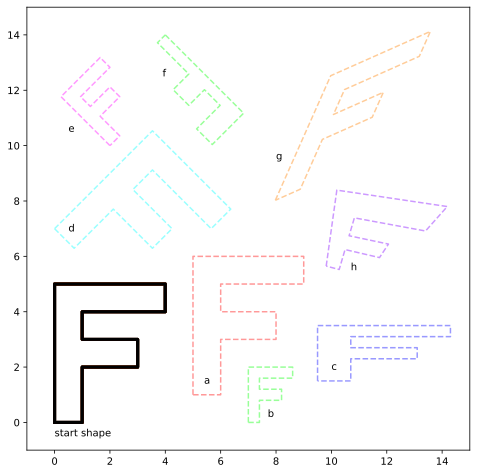

In [146]:
## TASK: Edit the transforms in this cell to align the outlined shapes
##       with the dotted outlines of the same letter and colour hue.

T_a = np.eye(3)
T_b = np.eye(3)
T_c = np.eye(3)
T_d = np.eye(3)
T_e = np.eye(3)
T_f = np.eye(3)
T_g = np.eye(3)
T_h = np.eye(3)

apply_and_draw_transforms()